**Read the Sales data set from file and check its info**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("1688639662_ausapparalsales4thqrt2020.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [2]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [31]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


In [32]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

**Data Wrangling**

Check for nulls, data cleanliness, outliers, standardization/normalization for numerical data

In [33]:
#check for nulls
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [34]:
#check for minimum and maximum date
print(df['Date'].min())
print(df['Date'].max())

2020-10-01 00:00:00
2020-12-30 00:00:00


In [35]:
#check distinct values in Time, State, Group columns
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [2]:
#Trim unwanted spaces at the beginning/end for Time, State, Group columns
for i in ['Time', 'State', 'Group']:
    df[i] = df[i].apply(lambda x: x.strip())
    print(df[i].unique())

['Morning' 'Afternoon' 'Evening']
['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
['Kids' 'Men' 'Women' 'Seniors']


**Check for Outliers using boxplot and IQR range calculation**

<Axes: >

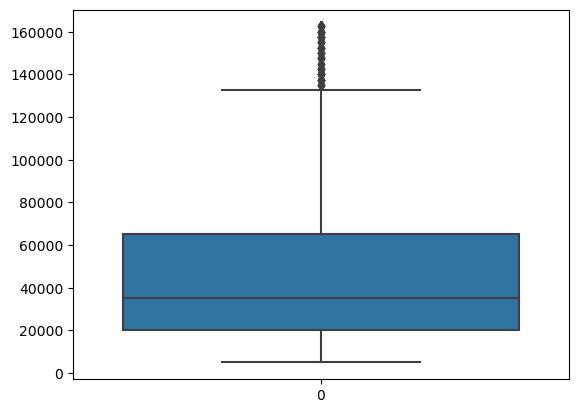

In [37]:
#Check for outliers in Sales using boxplot
# some outliers are seen for sales which can be ignored
import seaborn as sns
sns.boxplot(data=df['Sales'])

In [39]:
#check for outliers using IQR ranges
q1, q3 = df['Sales'].quantile([0.25, 0.75]).values
print(q1, q3)
iqr = q3 - q1
print(iqr)
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
print(upper_bound, lower_bound)
#There are some outliers which need not be removed for the current usecase as they are still valid Sales
df[ (df['Sales'] > upper_bound) | (df['Sales'] < lower_bound)]

20000.0 65000.0
45000.0
132500.0 -47500.0


,Date,Time,State,Group,Unit,Sales
5082,2020-12-01,Afternoon,VIC,Women,63,157500
5083,2020-12-01,Afternoon,VIC,Seniors,62,155000
5161,2020-12-02,Morning,VIC,Men,56,140000
5162,2020-12-02,Morning,VIC,Women,59,147500
5169,2020-12-02,Evening,VIC,Men,64,160000
...,...,...,...,...,...,...
7432,2020-12-29,Afternoon,VIC,Kids,65,162500
7433,2020-12-29,Afternoon,VIC,Men,54,135000
7437,2020-12-29,Evening,VIC,Men,54,135000
7515,2020-12-30,Morning,VIC,Seniors,65,162500


**Data Standardization and data normalization**

In [3]:
# Data scaling for numerical columns Unit and Sales using normalization(minmax scaling)/standardization(z-scores)
for i in ['Unit', 'Sales']:
    df[i + '_stand'] = (df[i] - df[i].mean())/df[i].std()
for i in ['Unit', 'Sales']:
    df[i + '_norm'] = (df[i] - df[i].min())/(df[i].max() - df[i].min())
df

,Date,Time,State,Group,Unit,Sales,Unit_stand,Sales_stand,Unit_norm,Sales_norm
0,2020-10-01,Morning,WA,Kids,8,20000,-0.775530,-0.775530,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,-0.775530,-0.775530,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,-1.085574,-1.085574,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,-0.232953,-0.232953,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,-1.163085,-1.163085,0.015873,0.015873
...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,-0.310464,-0.310464,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,-0.232953,-0.232953,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,-0.232953,-0.232953,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,-0.542997,-0.542997,0.142857,0.142857


In [41]:
# Check for state wise distribution of data. Data for each state is uniformly distributed
df['State'].value_counts(normalize=True)

WA     0.142857
NT     0.142857
SA     0.142857
VIC    0.142857
QLD    0.142857
NSW    0.142857
TAS    0.142857
Name: State, dtype: float64

**Using groupby to check for sales in each period of time and grouping by State/Group/Time to find price per unit**

In [42]:
#check for sum of sales at different time periods. (Morning has highest sales)
df.groupby('Time').sum('Sales')

,Unit,Sales,Unit_stand,Sales_stand,Unit_norm,Sales_norm
Time,,,,,,
Afternoon,45603,114007500,17.775845,17.775845,643.857143,643.857143
Evening,44835,112087500,-41.752566,-41.752566,631.666667,631.666667
Morning,45683,114207500,23.976721,23.976721,645.126984,645.126984


In [43]:
#Groupby State,Group,Time and find price per unit
grp = df.groupby(['State', 'Group', 'Time']).sum(numeric_only=True).sort_values('Sales')
grp['price_per_unit'] = grp['Sales']/grp['Unit']
#price is same for all
grp['price_per_unit']

State  Group    Time     
WA     Women    Afternoon    2500.0
NT     Seniors  Morning      2500.0
WA     Women    Morning      2500.0
       Seniors  Afternoon    2500.0
                Evening      2500.0
                              ...  
VIC    Seniors  Afternoon    2500.0
       Men      Evening      2500.0
       Women    Evening      2500.0
       Kids     Morning      2500.0
       Seniors  Morning      2500.0
Name: price_per_unit, Length: 84, dtype: float64

**Grouping using Pivot Tables** 

In [9]:
df.pivot_table(index=['Group', 'State'], columns='day', values='Sales', aggfunc='sum')

day                  0        1        2        3        4        5        6
Group   State                                                               
Kids    NSW    2430000  2927500  2842500  2637500  2625000  2565000  2560000
        NT      847500   820000   860000   865000   760000   762500   785000
        QLD    1127500  1237500  1280000  1225000  1242500  1232500  1165000
        SA     2135000  2120000  2040000  2152500  2157500  1965000  1945000
        TAS     812500   847500   850000   902500   792500   787500   782500
        VIC    3937500  4002500  3702500  3860000  3652500  3415000  3790000
        WA      822500   877500   795000   855000   785000   730000   760000
Men     NSW    2550000  2642500  3032500  2657500  2812500  2592500  2735000
        NT      830000   840000   787500   835000   922500   727500   820000
        QLD    1185000  1215000  1302500  1147500  1132500  1320000  1090000
        SA     2055000  2067500  2090000  2185000  2090000  2022500  2145000
        TAS     825000   790000   930000   797500   810000   765000   840000
        VIC    4070000  3720000  3835000  3885000  3890000  3385000  3622500
        WA      835000   790000   855000   807500   772500   807500   885000
Seniors NSW    2590000  2732500  2622500  2500000  2582500  2557500  2602500
        NT      795000   790000   832500   770000   790000   677500   810000
        QLD    1107500  1257500  1222500  1220000  1157500  1082500  1142500
        SA     1945000  2272500  2067500  2210000  2145000  1927500  2150000
        TAS     757500   825000   805000   850000   845000   747500   820000
        VIC    3672500  3982500  3980000  3970000  3325000  3740000  3645000
        WA      720000   807500   847500   790000   732500   745000   870000
Women   NSW    2505000  2915000  2847500  2862500  2672500  2647500  2722500
        NT      775000   882500   867500   815000   792500   732500   787500
        QLD    1205000  1252500  1087500  1170000  1117500  1247500  1245000
        SA     2185000  2105000  2125000  2122500  2170000  2022500  2240000
        TAS     710000   860000   815000   847500   770000   742500   832500
        VIC    3872500  3937500  3815000  3815000  3612500  3587500  3842500
        WA      747500   810000   807500   650000   842500   710000   695000

**Data Analysis:: describe data for mean, median, mode, SD, determine group/state with high/low sales, generate reports for analysis made**

In [10]:
#describe Unit, Sales columns for count, mean, std, min, max, quartiles
df[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [47]:
#median
df[['Unit', 'Sales']].median()

Unit        14.0
Sales    35000.0
dtype: float64

In [48]:
#mode
df[['Unit', 'Sales']].mode()

,Unit,Sales
0,9,22500


In [49]:
#determine group generating highest sales and group generating lowest sales
df.groupby('Group').sum('Sales').sort_values('Sales')
#'Seniors' group is generating lowest sales and 'Men' group is generating highest sales

,Unit,Sales,Unit_stand,Sales_stand,Unit_norm,Sales_norm,day
Group,,,,,,,
Seniors,33615,84037500,-32.186422,-32.186422,473.571429,473.571429,5628
Kids,34029,85072500,-0.096889,-0.096889,480.142857,480.142857,5628
Women,34177,85442500,11.374732,11.374732,482.492063,482.492063,5628
Men,34300,85750000,20.908579,20.908579,484.444444,484.444444,5628


In [50]:
#determine state generating highest sales and state generating lowest sales
df.groupby('State').sum('Sales').sort_values('Sales')
#'WA' state is generating lowest sales and 'VIC' state is generating highest sales

,Unit,Sales,Unit_stand,Sales_stand,Unit_norm,Sales_norm,day
State,,,,,,,
WA,8861,22152500,-820.442345,-820.442345,106.365079,106.365079,3216
NT,9032,22580000,-807.187972,-807.187972,109.079365,109.079365,3216
TAS,9104,22760000,-801.607183,-801.607183,110.222222,110.222222,3216
QLD,13367,33417500,-471.177999,-471.177999,177.888889,177.888889,3216
SA,23543,58857500,317.573440,317.573440,339.412698,339.412698,3216
NSW,29988,74970000,817.131520,817.131520,441.714286,441.714286,3216
VIC,42226,105565000,1765.710539,1765.710539,635.968254,635.968254,3216


In [4]:
# Add day, week,month, quarter columns
df['day'] = df['Date'].dt.day_of_week
df['month'] = df['Date'].dt.month_name()
df['week'] = df['Date'].dt.isocalendar().week
df['quarter'] = df['Date'].dt.quarter
df

,Date,Time,State,Group,Unit,Sales,Unit_stand,Sales_stand,Unit_norm,Sales_norm,day,month,week,quarter
0,2020-10-01,Morning,WA,Kids,8,20000,-0.775530,-0.775530,0.095238,0.095238,3,October,40,4
1,2020-10-01,Morning,WA,Men,8,20000,-0.775530,-0.775530,0.095238,0.095238,3,October,40,4
2,2020-10-01,Morning,WA,Women,4,10000,-1.085574,-1.085574,0.031746,0.031746,3,October,40,4
3,2020-10-01,Morning,WA,Seniors,15,37500,-0.232953,-0.232953,0.206349,0.206349,3,October,40,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,-1.163085,-1.163085,0.015873,0.015873,3,October,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,-0.310464,-0.310464,0.190476,0.190476,2,December,53,4
7556,2020-12-30,Evening,TAS,Kids,15,37500,-0.232953,-0.232953,0.206349,0.206349,2,December,53,4
7557,2020-12-30,Evening,TAS,Men,15,37500,-0.232953,-0.232953,0.206349,0.206349,2,December,53,4
7558,2020-12-30,Evening,TAS,Women,11,27500,-0.542997,-0.542997,0.142857,0.142857,2,December,53,4


In [45]:
# monthly sales report for each Group
df.groupby(['Group', 'month']).sum(numeric_only=True).sort_values(['Group', 'month'])['Sales']

Group     month   
 Kids     December    33555000
          November    22882500
          October     28635000
 Men      December    34250000
          November    22615000
          October     28885000
 Seniors  December    33150000
          November    22322500
          October     28565000
 Women    December    34375000
          November    22862500
          October     28205000
Name: Sales, dtype: int64

In [46]:
# weekly sales report for each Group
df.groupby(['Group', 'week']).sum(numeric_only=True).sort_values(['Group', 'week'])['Sales']

Group     week
 Kids     40      3690000
          41      7020000
          42      6707500
          43      6525000
          44      5490000
          45      5125000
          46      5315000
          47      5302500
          48      5577500
          49      7362500
          50      8030000
          51      7765000
          52      7630000
          53      3532500
 Men      40      3730000
          41      6807500
          42      6710000
          43      6872500
          44      5507500
          45      5335000
          46      5242500
          47      5025000
          48      5482500
          49      7505000
          50      7802500
          51      7990000
          52      8337500
          53      3402500
 Seniors  40      3782500
          41      6737500
          42      6470000
          43      6757500
          44      5540000
          45      4962500
          46      5397500
          47      5200000
          48      5302500
          49      72175

In [54]:
# quarterly sales report for each Group
df.groupby(['Group', 'quarter']).sum(numeric_only=True).sort_values(['Group', 'quarter'])['Sales']

Group    quarter
Kids     4          85072500
Men      4          85750000
Seniors  4          84037500
Women    4          85442500
Name: Sales, dtype: int64

In [55]:
# monthly sales report for each State
df.groupby(['State', 'month']).sum(numeric_only=True).sort_values(['State', 'month'])['Sales']

State  month   
NSW    December    28472500
       November    21490000
       October     25007500
NT     December     9100000
       November     5257500
       October      8222500
QLD    December    14187500
       November     8110000
       October     11120000
SA     December    22715000
       November    15532500
       October     20610000
TAS    December     9200000
       November     5545000
       October      8015000
VIC    December    42592500
       November    29530000
       October     33442500
WA     December     9062500
       November     5217500
       October      7872500
Name: Sales, dtype: int64

In [56]:
# weekly sales report for each State
df.groupby(['State', 'week']).sum(numeric_only=True).sort_values(['State', 'week'])['Sales']

State  week
NSW    40      3382500
       41      5892500
       42      5717500
       43      5922500
       44      4822500
                ...   
WA     49      2060000
       50      2145000
       51      2005000
       52      2092500
       53       925000
Name: Sales, Length: 98, dtype: int64

In [11]:
# quarterly sales report for each State
df.groupby(['State', 'quarter']).sum(numeric_only=True).sort_values(['State', 'quarter'])['Sales']

State  quarter
NSW    4           74970000
NT     4           22580000
QLD    4           33417500
SA     4           58857500
TAS    4           22760000
VIC    4          105565000
WA     4           22152500
Name: Sales, dtype: int64

**DATA VISUALIZATION-----state-wise, group-wise, time of the day analysis**

<Axes: xlabel='State', ylabel='Sales'>

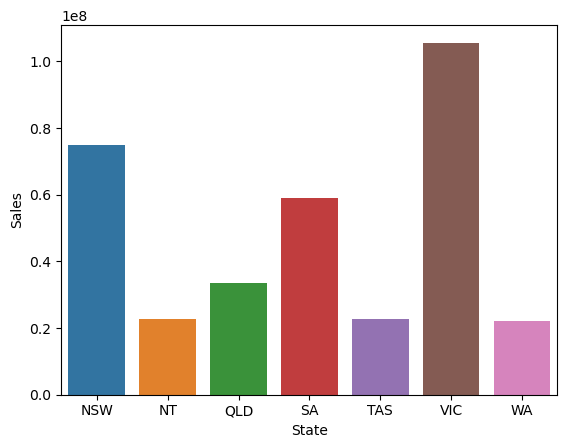

In [6]:
#State-wise sales visualization. Using seaborn for statistical analysis
grp = df.groupby('State').sum('Sales')
sns.barplot(data=grp.reset_index(), x='State', y='Sales', errwidth=0)
#'WA' state is generating lowest sales and 'VIC' state is generating highest sales

<Axes: xlabel='Group', ylabel='Sales'>

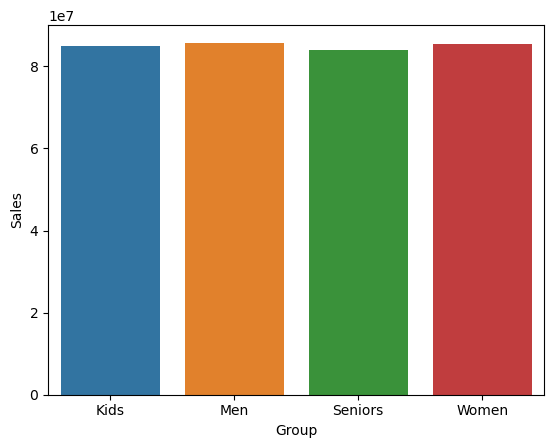

In [7]:
#Group-wise sales visualization. Using seaborn for statistical analysis
grp = df.groupby('Group').sum('Sales')
sns.barplot(data=grp.reset_index(), x='Group', y='Sales', errwidth=0)
#'Seniors' group is generating lowest sales and 'Men' group is generating highest sales

<Axes: xlabel='State', ylabel='Sales'>

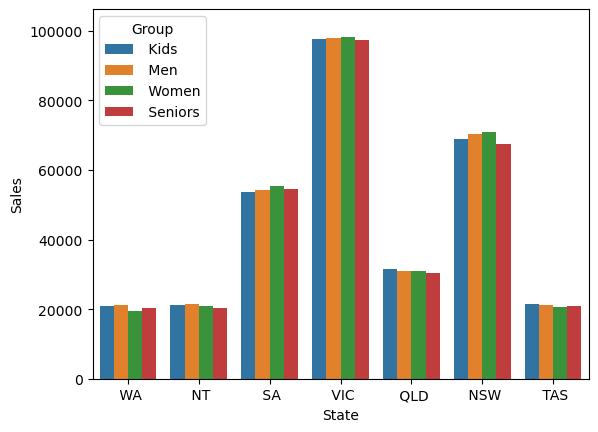

In [55]:
#State-wise sales across each group. Using seaborn for statistical analysis
sns.barplot(x='State', y='Sales', hue='Group',data=df, errwidth=0)

<Axes: xlabel='Group', ylabel='Sales'>

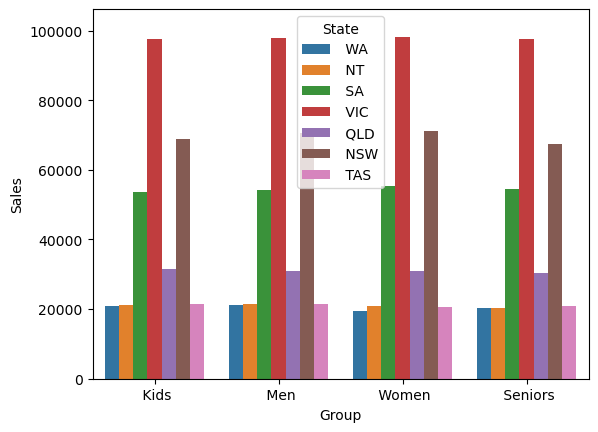

In [60]:
#group-wise sales across each state
sns.barplot(x='Group', y='Sales', hue='State',data=df, errwidth=0)

<Axes: xlabel='Group,month'>

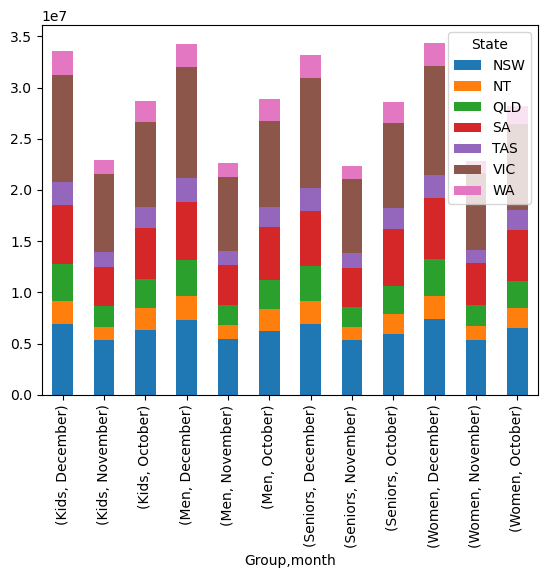

In [15]:
#monthly chart for group wise analysis across different states
pivot = df.pivot_table(index=['Group', 'month'], columns='State', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True)

<Axes: xlabel='State,month'>

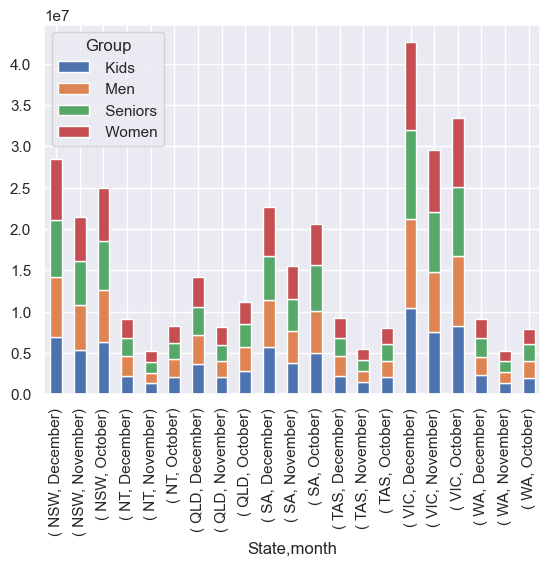

In [78]:
#monthly chart for state wise analysis across different groups
pivot = df.pivot_table(index=['State', 'month'], columns='Group', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True)

<Axes: xlabel='Group,quarter'>

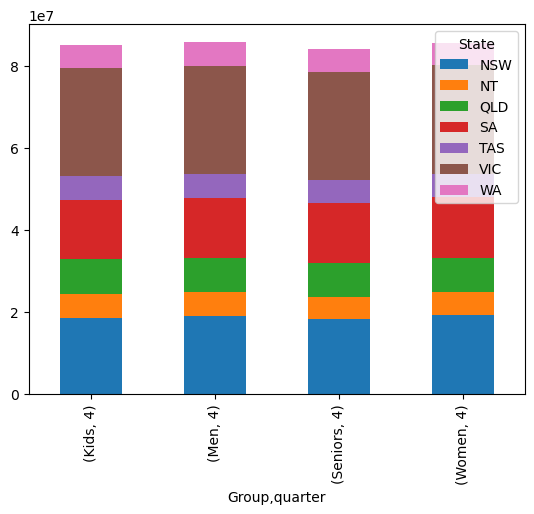

In [17]:
#quarterly chart for group wise analysis across different states
pivot = df.pivot_table(index=['Group', 'quarter'], columns='State', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True)

<Axes: xlabel='State,quarter'>

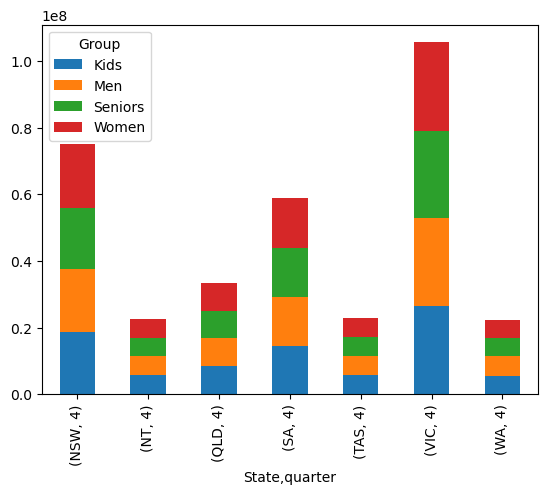

In [16]:
#quarterly chart for state wise analysis across different groups
pivot = df.pivot_table(index=['State', 'quarter'], columns='Group', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True)

<Axes: xlabel='Group,day'>

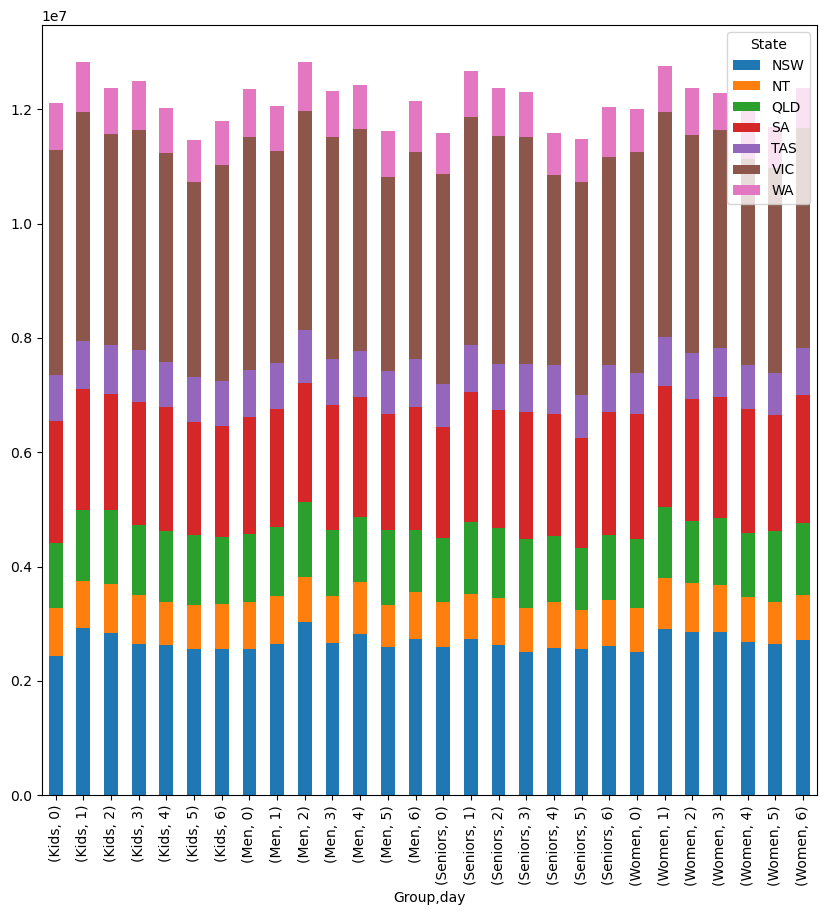

In [18]:
#day of the week chart for group wise analysis across different states
pivot = df.pivot_table(index=['Group', 'day'], columns='State', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True, figsize=(10, 10))

<Axes: xlabel='State,day'>

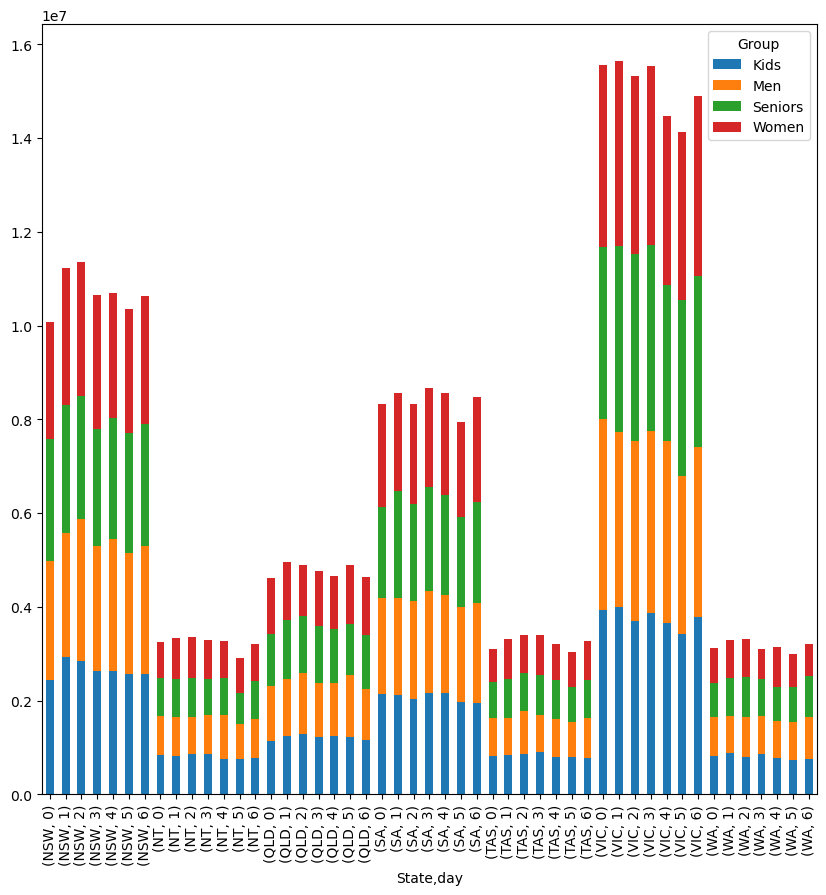

In [19]:
#day of the week chart for state wise analysis across different groups
pivot = df.pivot_table(index=['State', 'day'], columns='Group', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True, figsize=(10, 10))

[Text(0, 0, '1.14008e+08'),
 Text(0, 0, '1.12088e+08'),
 Text(0, 0, '1.14208e+08')]

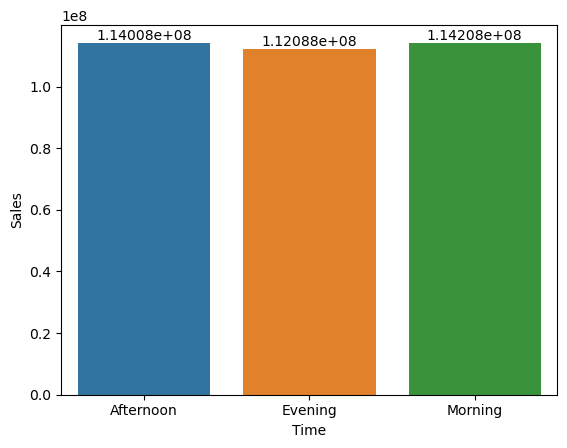

In [21]:
#Time of the day analysis. Morning has high sales and evening has low sales
grp = df.groupby('Time').sum('Sales')
ax = sns.barplot(data=grp.reset_index(), x='Time', y='Sales', errwidth=0)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Time', ylabel='Sales'>

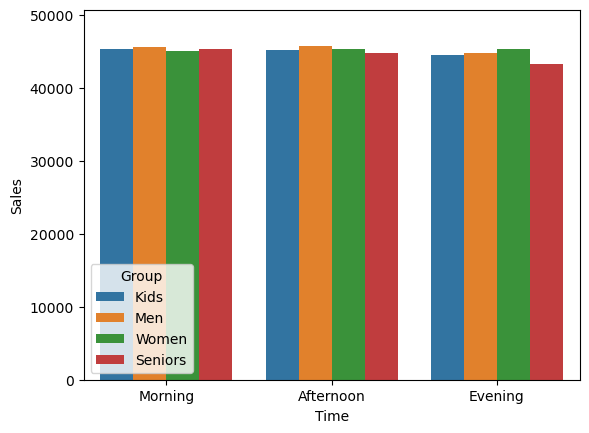

In [22]:
#Time of the day analysis by group.
sns.barplot(x='Time', y='Sales', hue='Group',data=df, errwidth=0)

<Axes: xlabel='Time', ylabel='Sales'>

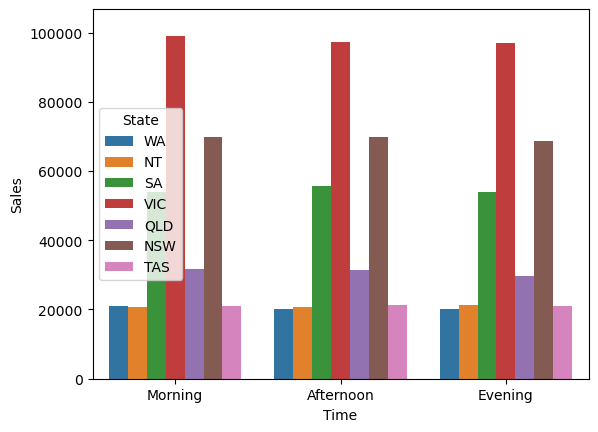

In [23]:
#Time of the day analysis by State.
sns.barplot(x='Time', y='Sales', hue='State',data=df, errwidth=0)

<Axes: xlabel='Group,Time'>

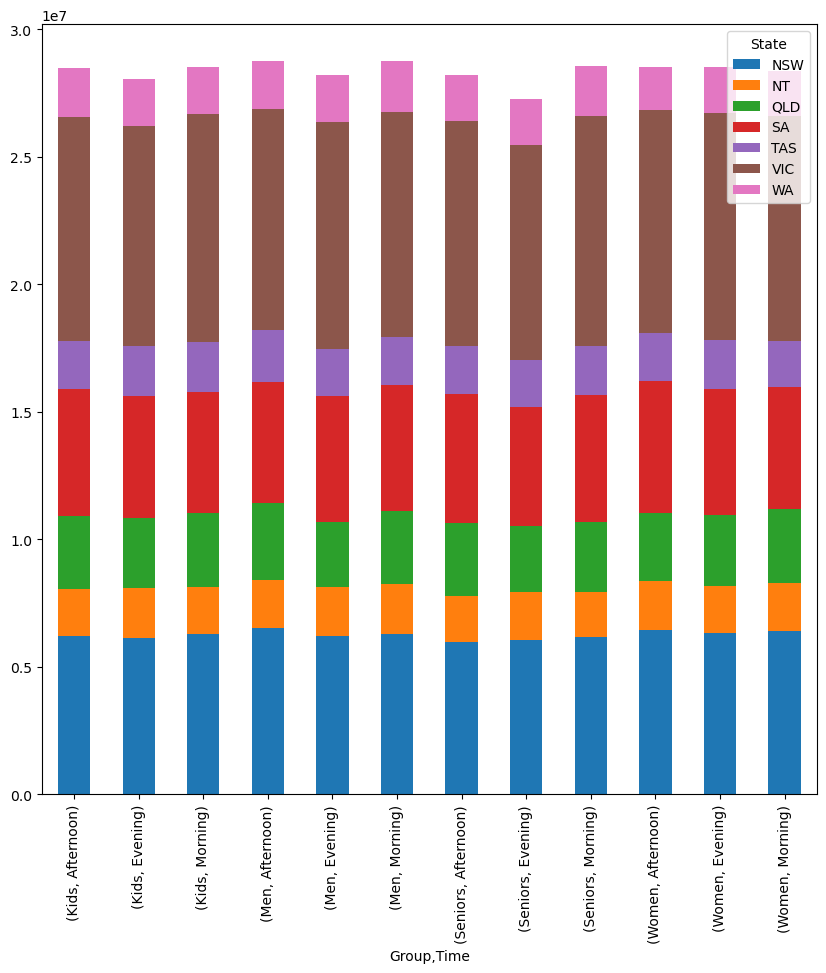

In [24]:
#TimeOfTheDay chart for group wise analysis across different states
pivot = df.pivot_table(index=['Group', 'Time'], columns='State', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True, figsize=(10, 10))

<Axes: xlabel='State,Time'>

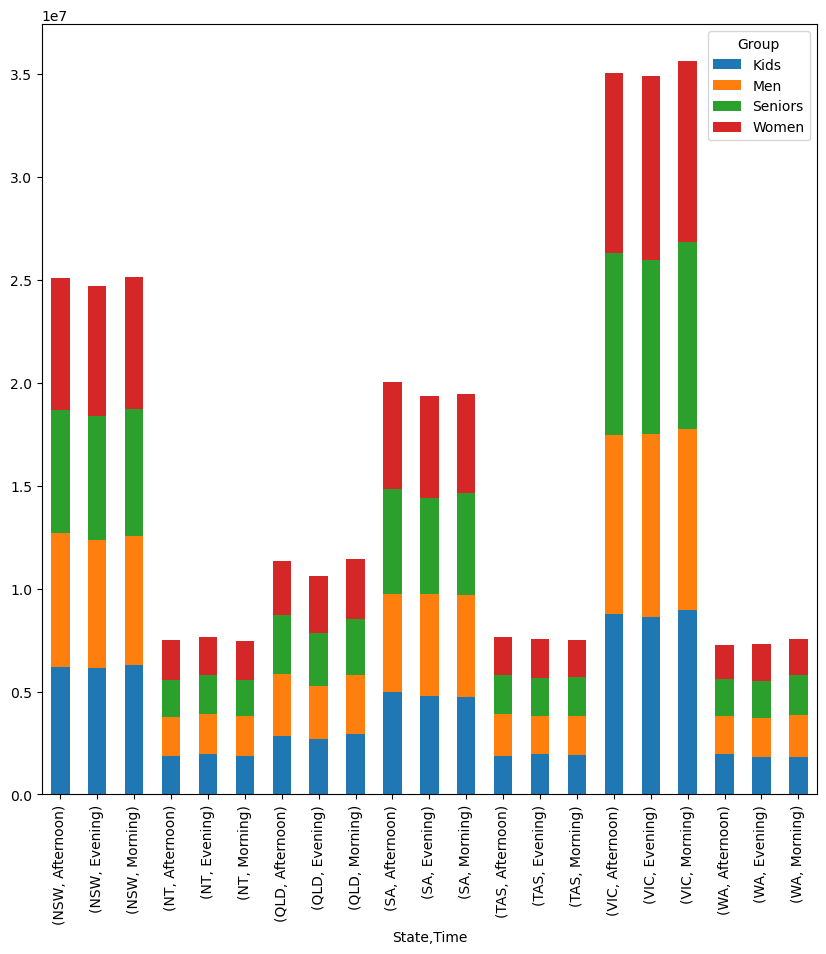

In [25]:
#TimeOfTheDay chart for state wise analysis across different groups
pivot = df.pivot_table(index=['State', 'Time'], columns='Group', values='Sales', aggfunc='sum')
pivot.plot.bar(stacked=True, figsize=(10, 10))

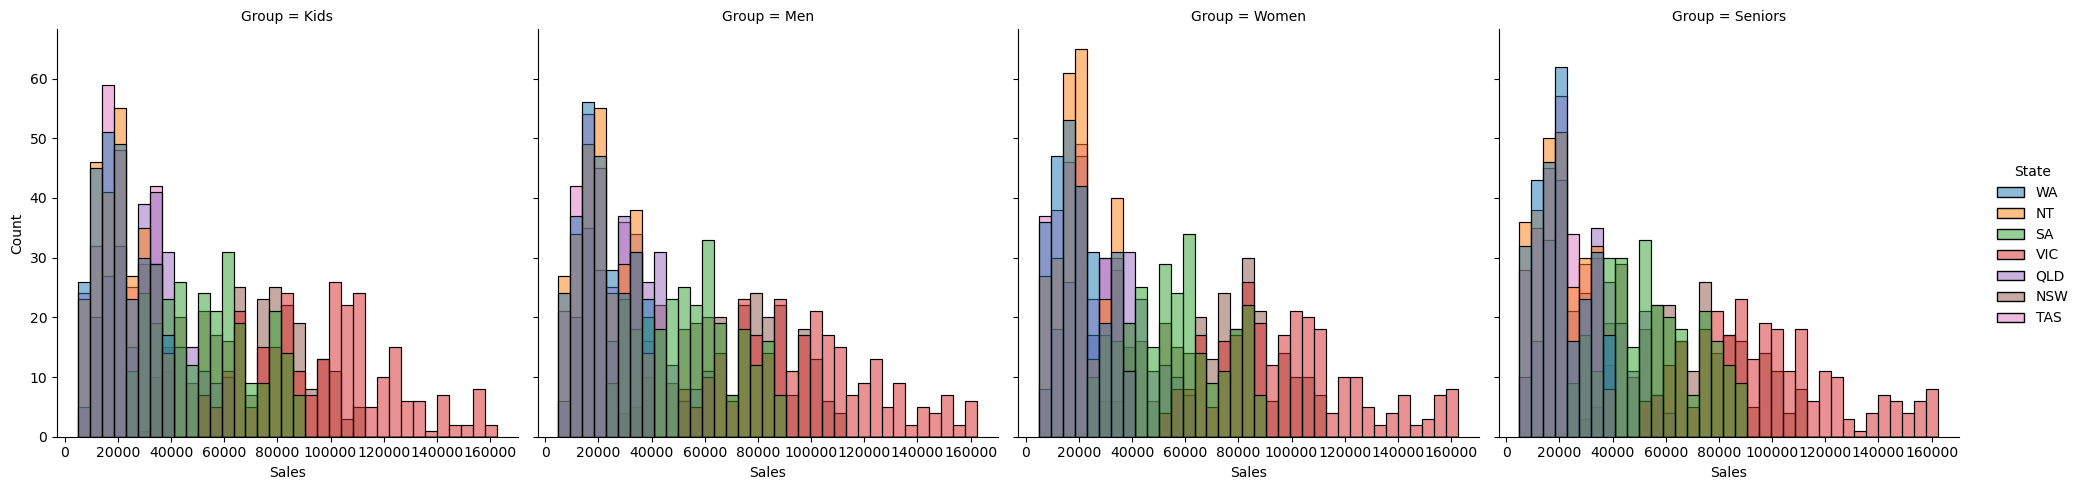

In [6]:
sns.displot(df, x="Sales", hue="State", col="Group")